<a href="https://colab.research.google.com/github/elbixos/L3_IA/blob/master/Cours/TP/heartDiseaseUCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Licence Info 3, cours d'Intelligence Artificielle, université des Antilles
## Travaux Pratiques sur la base Heart Disease UCI / Cleveland

### La base Hear Disease Cleveland

Cette base provient d'ici : [https://www.kaggle.com/ronitf/heart-disease-uci](https://https://www.kaggle.com/ronitf/heart-disease-uci)


Elle contient 303 exemples concernant des patients atteints ou non d'un problème cardiaque. Elle est contenue dans un fichier **csv** dont voici les détails :

#### colonnes du fichier csv
Je les numérote à partir de zéros, car les programmes plus loin utiliseront cette convention...

0. age
1. sex (1 for male, 0 female)
2. chest pain type (4 values)
3. resting blood pressure
4. serum cholestoral in mg/dl
5. fasting blood sugar > 120 mg/dl
6. resting electrocardiographic results (values 0,1,2)
7. maximum heart rate achieved
8. exercise induced angina
9. oldpeak = ST depression induced by exercise relative to rest
10. the slope of the peak exercise ST segment
11. number of major vessels (0-3) colored by flourosopy
12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
13. target : presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Description du problème 

Dans un premier temps, on pourra essayer de faire un programme, qui, connaissant les informations de 0 à 12, essaye de deviner si le patient à un probleme cardiaque (col 13 !=0) ou non (col 13 == 1)

**Question :** Quel type de problème voulons nous résoudre (clustering, classification, régression) ?

#### téléchargement du fichier csv

nous allons tout d'abord récuperer ce fichier.


*Je vous rappelle que vous pouvez executer tout ce code. Vous pouvez meme modifier le code ou le texte de ce fichier, cela ne modifiera que votre copie du fichier (pas ma version...)*


In [1]:
import numpy as np
import pandas as pd

url="https://raw.githubusercontent.com/elbixos/L3_IA/master/Preparation/HeartDiseasesUCI/heart.csv"

!wget $url

--2020-03-25 20:52:47--  https://raw.githubusercontent.com/elbixos/L3_IA/master/Preparation/HeartDiseasesUCI/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv.1’

heart.csv.1         100%[===================>]  11.06K  --.-KB/s    in 0s      

2020-03-25 20:52:47 (89.8 MB/s) - ‘heart.csv.1’ saved [11328/11328]



#### Lecture du fichier

Il s'agit maintenant de lire le fichier pour stocker les données.

Pour le stockage, l'exemple qui suit utilise un *Panda Dataframe*,
qui permet de stocker des données bi dimensionnelles hétérogènes et de les manipuler de façon facile.




In [2]:
filename="heart.csv"
data = pd.read_csv(filename)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


On voit que chaque colonne est nommée.

Voici encore quelques informations sur ces données :
- la taille de la base
- les 4 premiers exemples


In [3]:
print(data.shape)
data.head(4)


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


#### Récupération d'une colonne

En fait, la manipulation des données nécessitera sans doute d'aller fouiller un peu la documentation des panda Dataframe. Vous pouvez par exemple aller voir ceci : [https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

En attendant voici déja comment récuperer une colonne.

In [4]:
x = data.age
print (x)
print(type(x))


0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64
<class 'pandas.core.series.Series'>


Tracons maintenant un nuage de points 2D de ces données.
Par exemple, la répartition age, cholesterol

Vous pourrez trouver un tutoriel sur le tracé de courbes ici :
[https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

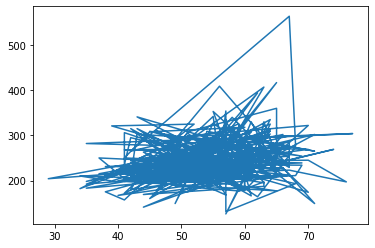

In [5]:
import matplotlib.pyplot as plt

plt.plot(data.age,data.chol,)
plt.show()

C'est moche, puisque le plot trace par défaut une ligne entre tous les points. Voici une version plus jolie...

Pour tracer le nuage de points, on utilise scatter.

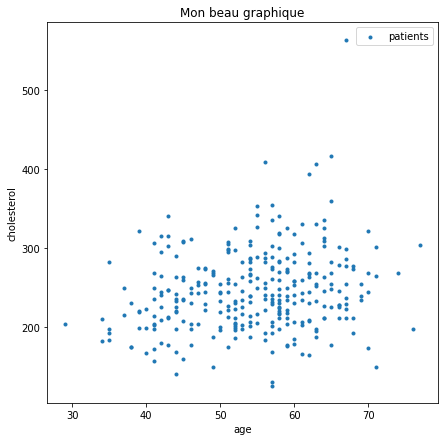

In [20]:
# Ici, j'utilise subplot, qui renvoie :
#   - fig : la figure
#   - ax : le tuple des sous figures (les sous figures sont appelées axes en matplotlib)
#
#   comme je ne passe pas de parametres à subplot, il n'y aura qu'une sous figure
#   et ax ne sera pas un tuple, mais la sous figure unique.

fig, ax = plt.subplots(figsize=(7,7))  # Create a figure and an axes.
ax.scatter(data.age, data.chol, marker='.',  label='patients')
# Plot some data on the axes.
ax.set_xlabel('age')  # Add an x-label to the axes.
ax.set_ylabel('cholesterol')  # Add a y-label to the axes.
ax.set_title("Mon beau graphique")  # Add a title to the axes.
ax.legend();  # Add a legend.

Pour en finir pour le moment avec le tracé de courbes, voici un double graphique dans une seule figure qui devrait vous aider à couvrir un certain nombre de vos besoins.

je trace sur la figure de gauche
- en rouge, le nuage (age, chol) des hommes
- en bleu, le nuage (age, chol) des femmes

je trace sur la figure de gauche
- en vert, le nuage (age,thalac) des hommes
- en jaune, le nuage (age,thalac) des femmes



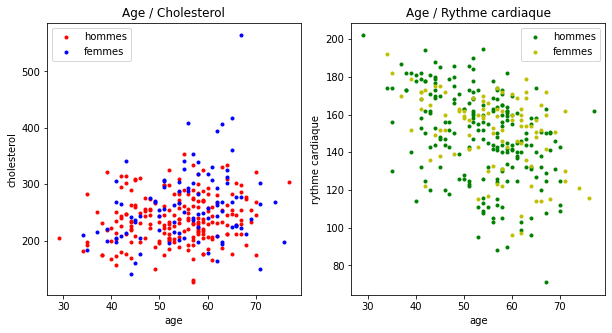

In [19]:
# séparation homme femmes
hommes= data[data.sex == 1]
femmes= data[data.sex == 0]

# la figure est un ensemble de sous figure organisé comme suit:
#   1 ligne, 2 colonnes
fig, ax = plt.subplots(1,2,figsize=(10,5))  # Create a figure and an axes.

# ax est maintenant un tuple de deux sous figures.

# figure de gauche
ax[0].scatter(hommes.age, hommes.chol, color='r', marker='.',  label='hommes')
ax[0].scatter(femmes.age, femmes.chol, color='b',marker='.',  label='femmes')

ax[0].set_xlabel('age')  # Add an x-label to the axes.
ax[0].set_ylabel('cholesterol')  # Add a y-label to the axes.
ax[0].set_title("Age / Cholesterol")  # Add a title to the axes.
ax[0].legend()  # Add a legend.

# figure de droite
ax[1].scatter(hommes.age, hommes.thalach, color='g', marker='.',  label='hommes')
ax[1].scatter(femmes.age, femmes.thalach, color='y', marker='.',  label='femmes')

ax[1].set_xlabel('age')  # Add an x-label to the axes.
ax[1].set_ylabel('rythme cardiaque')  # Add a y-label to the axes.
ax[1].set_title("Age / Rythme cardiaque")  # Add a title to the axes.
ax[1].legend();  # Add a legend.


J'espere que vous avez noté la facilité avec laquelle on selectionne des exemples dans la base...

Je vais en profiter pour sauver la figure dans un fichier png pour l'incorporer dans un rapport eventuel ou un site web...

Vous pouvez retrouver ce fichier en cliquant sur l'icone de répertoire, à gauche de ce texte...

In [21]:
plt.savefig('figureDeOuf.png')

<Figure size 432x288 with 0 Axes>